# QUESTION 1
# Introduction:
# Special thanks to: https://github.com/justmarkham for sharing the dataset andmaterials.
# Occupations


# ANSWER 1 -

# Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

# Step 2. Import the dataset from this address.

In [75]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# Step 3. Assign it to a variable called users

In [76]:

users = pd.read_csv(url)
abc = users['user_id|age|gender|occupation|zip_code'].str.split('|',expand = True)
users['user_id'] = abc[0]
users['age']=abc[1]
users['gender']=abc[2]
users['occupation']=abc[3]
users['zip_code']=abc[4]
users.drop(columns = ['user_id|age|gender|occupation|zip_code'], inplace = True)
users['age']=users['age'].astype(int)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Step 4. Discover what is the mean age per occupation

In [2]:

users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [71]:
genderM=users[users['gender']=='M']

male = genderM.groupby('occupation')[['gender']].count()
all =  users.groupby('occupation')[['gender']].count()
all['male']=male
all['male ratio']=(all['male']/all['gender'])

all.sort_values('male ratio',ascending=False)[['male ratio']]

,male ratio
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


# Step 6. For each occupation, calculate the minimum and maximum ages

In [72]:
age =  round(users.groupby('occupation')[['age']].mean())
age['min age'] =  users.groupby('occupation')[['age']].min()
age['max age'] =  users.groupby('occupation')[['age']].max()
age[['min age','max age']]

,min age,max age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


# Step 7. For each combination of occupation and sex, calculate the mean age# 

In [73]:
com =round(users.groupby(['occupation','gender'])[['age']].mean())
com

age
occupation    gender      
administrator F       41.0
              M       37.0
artist        F       30.0
              M       32.0
doctor        M       44.0
educator      F       39.0
              M       43.0
engineer      F       30.0
              M       37.0
entertainment F       31.0
              M       29.0
executive     F       44.0
              M       38.0
healthcare    F       40.0
              M       45.0
homemaker     F       34.0
              M       23.0
lawyer        F       40.0
              M       36.0
librarian     F       40.0
              M       40.0
marketing     F       37.0
              M       38.0
none          F       36.0
              M       19.0
other         F       35.0
              M       34.0
programmer    F       32.0
              M       33.0
retired       F       70.0
              M       63.0
salesman      F       27.0
              M       39.0
scientist     F       28.0
              M       36.0
student       F       21.0
              M       23.0
technician    F       38.0
              M       33.0
writer        F       38.0
              M       35.0

# Step 8. For each occupation present the percentage of women and men

In [74]:
genderM=users[users['gender']=='M']
genderF=users[users['gender']=='F']

male = genderM.groupby('occupation')[['gender']].count()
female = genderF.groupby('occupation')[['gender']].count()

all =  users.groupby('occupation')[['gender']].count()
all['male'] = male
all['female'] = female
all['male percentage']=round((all['male']/all['gender'])*100)
all['female percentage']=round((all['female']/all['gender'])*100)

all[['male percentage','female percentage']]

,male percentage,female percentage
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,NaN
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


# QUESTION 2
# Euro Teams


# ANSWER 2 -

This time we are going to pull data directly from the internet.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/jokecamp/FootballData/master/Euro%202012/Euro%202012%20stats%20TEAM.csv). 

### Step 3. Assign it to a variable called euro12.

In [3]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/jokecamp/FootballData/master/Euro%202012/Euro%202012%20stats%20TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 4. Select only the Goal column.

In [4]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [5]:
euro12.shape[0]

16

### Step 6. What is the number of columns in the dataset?

In [6]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [7]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [8]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [9]:
round(discipline['Yellow Cards'].mean())

7.0

### Step 10. Filter teams that scored more than 6 goals

In [10]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [11]:
euro12[5:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [13]:
euro.iloc[: , 0:7]


#Doubt

NameError: name 'euro' is not defined

### Step 13. Select all columns except the last 3.

In [14]:
euro.iloc[: , :-3]

NameError: name 'euro' is not defined

### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [15]:
euro12.loc[[3,7,12] , ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# QUESTION 3
# Housing

# ANSWER 3 - 

# Introduction:This time we will create our own dataset with fictional numbers to describe a house market. As we are going to create random data don't try to reason of the numbers.
# Step 1. Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np

# Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

In [6]:

s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print (s1, s2, s3)

0     3
1     2
2     2
3     2
4     4
     ..
95    4
96    4
97    3
98    4
99    4
Length: 100, dtype: int32 0     2
1     3
2     2
3     2
4     3
     ..
95    1
96    1
97    1
98    3
99    1
Length: 100, dtype: int32 0     18792
1     17109
2     18959
3     28330
4     10013
      ...  
95    16474
96    27017
97    15204
98    20283
99    24788
Length: 100, dtype: int32


# Step 3. Let's create a DataFrame by joinning the Series by column

In [9]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,3,2,18792
1,2,3,17109
2,2,2,18959
3,2,2,28330
4,4,3,10013


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [10]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,18792
1,2,3,17109
2,2,2,18959
3,2,2,28330
4,4,3,10013


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [14]:
# join concat the values
bigcolumn = pd.concat([s1, s2, s3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
bigcolumn = bigcolumn.to_frame()
print (bigcolumn)
 
bigcolumn

        0
0       3
1       2
2       2
3       2
4       4
..    ...
95  16474
96  27017
97  15204
98  20283
99  24788

[300 rows x 1 columns]


,0
0,3
1,2
2,2
3,2
4,4
...,...
95,16474
96,27017
97,15204
98,20283


# Step 6. Ops it seems it is going only until index 99. Is it true?

In [15]:
if (max(bigcolumn.index)==99):
	print('True')
else:
	print('False')

True


# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [16]:
new_index=[x for x in range(0,300)]
bigcolumn = pd.concat([s1, s2, s3], axis=0,ignore_index=True)
bigcolumn = bigcolumn.to_frame()
bigcolumn=bigcolumn.reindex(new_index)
bigcolumn

,0
0,3
1,2
2,2
3,2
4,4
...,...
295,16474
296,27017
297,15204
298,20283


# QUESTION 4

# Wind Statistics
# The data have been modified to contain some missing values, identified by NaN.
# Using pandas should make this exercise easier, in particular for the bonus question.
# You should be able to perform all of these operations without using a for loop or other looping construct.
# The data in 'wind.data' has the following format:
# Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
# 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
# 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
# 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
# BDAT 1004 â€“ Data Programming
# Page 3 of 5
# S2020
# BDAT 1004 Computer Studies
# e first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

# ANSWER 4 -

# Step 1. Import the necessary libraries

In [17]:
import pandas as pd
import numpy as np
import datetime

# Step 2. Import the dataset from this address

In [18]:
data = pd.read_csv("wind.txt", sep= '\s+', parse_dates=[[0,1,2]] )
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. :

In [27]:
def mod_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year,x.month,x.day)

In [29]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(mod_year)

KeyError: 'Yr_Mo_Dy'

# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [23]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

KeyError: 'Yr_Mo_Dy'

# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [22]:
data = data.set_index("Yr_Mo_Dy")
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


# Step 6. Compute how many values are missing for each location over the entire record.

In [30]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [31]:
def missing(x):
    return pd.Series([x.isnull().sum()])

In [33]:
data._get_numeric_data().apply(lambda x: missing(x))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,6,3,2,5,2,0,3,2,3,1,0,4


# Step 7. Compute how many non-missing values there are in total.

In [34]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [35]:
def not_missing(x):
    return pd.Series([x.notnull().sum()])

In [36]:
data._get_numeric_data().apply(lambda x: not_missing(x))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,6568,6571,6572,6569,6572,6574,6571,6572,6571,6573,6574,6570


# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [37]:
data.fillna(0).values.mean()

10.223864592840481

# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days\n

In [38]:
def var_summary(x):
    return pd.Series([x.min(),x.max(),x.mean(),x.std()],index= ['Min','Max','Mean','Std'])

In [39]:
loc_stats = data._get_numeric_data().apply(lambda x: var_summary(x)).T
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.\n

In [40]:
day_stats= pd.DataFrame()
day_stats

""


In [41]:
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


# Step 11. Find the average windspeed in January for each location.

In [42]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

# Step 12. Downsample the record to a yearly frequency for each location.')

In [43]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


# Step 13. Downsample the record to a monthly frequency for each location.')

In [44]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


# Step 14. Downsample the record to a weekly frequency for each location.

In [45]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


# Step 15. Calculate the mean windspeed for each month in the dataset.

In [46]:
data.groupby(data.index.to_period('m')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


# Step 16. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.')

In [47]:
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
...           ...    ...        ...       ...    ...    ...        ...   
1978-12-03   9.08  21.29  14.934286  4.931754   4.54  21.34  11.232857   
1978-12-10   9.92  29.33  20.740000  7.215012  12.54  24.79  19.190000   
1978-12-17   9.87  23.13  16.758571  4.499431   3.21  24.04  14.692857   
1978-12-24   6.21  16.62  11.155714  3.522759   3.63  13.29   8.008571   
1978-12-31   7.21  20.33  14.951429  4.350400   5.46  17.41  11.801429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-01       NaN  13.17  13.17  ...  12.580000       NaN  18.50  18.50   
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
...              ...    ...    ...  ...        ...       ...    ...    ...   
1978-12-03  5.978968   8.21  24.04  ...   9.547143  6.284973   4.92  21.42   
1978-12-10  4.953060   7.21  25.37  ...  14.082857  5.516405   9.54  26.08   
1978-12-17  7.578665   8.04  18.05  ...   8.565714  5.487801   5.00  21.50   
1978-12-24  3.882900   8.50  22.21  ...   8.072857  3.023131   3.21  19.79   
1978-12-31  4.705392   7.83  27.29  ...  11.471429  5.533397   1.21  21.79   

                                   MAL                               
                 mean       std    min    max       mean        std  
Yr_Mo_Dy                                                             
1961-01-01  18.500000       NaN  15.04  15.04  15.040000        NaN  
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571   1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286   4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286   4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000   3.874721  
...               ...       ...    ...    ...        ...        ...  
1978-12-03  11.835714  5.950112  11.50  25.75  18.728571   6.393188  
1978-12-10  18.517143  5.600389  15.34  34.59  23.061429   8.093976  
1978-12-17  11.102857  6.631925   6.92  22.83  15.562857   6.005594  
1978-12-24  11.845714  5.750301  10.29  31.71  18.977143   7.194108  
1978-12-31  12.947143  7.523148  11.96  41.46  26.844286  11.621233  

[940 rows x 48 columns]

# QUESTION 5

# ANSWER 5 -

# This time we are going to pull data directly from the internet. Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

# Step 1. Import the necessary libraries

In [48]:
import pandas as pd

# Step 2. Import the dataset from this address.

In [49]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Step 3. Assign it to a variable called chipo.¶

In [50]:
chipo = pd.read_csv(url, sep = '\t')

# Step 4. See the first 10 entries

In [51]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5. What is the number of observations in the dataset?

In [52]:
chipo.info
# OR
chipo.shape[0]

4622

# Step 6. What is the number of columns in the dataset?

In [53]:
chipo.shape[1]

5

# Step 7. Print the name of all the columns.

In [54]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

# Step 8. How is the dataset indexed?

In [55]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Step 9. Which was the most ordered item?

In [56]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

# Step 10. How many items were ordered?

In [58]:
total_items = chipo.item_name.value_counts()


total= chipo.quantity.sum()


# Step 11. What was the most ordered item in the choice_description column?¶

In [59]:
chipo.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

# Step 12. How many items were orderd in total?

In [60]:
total_orders = chipo.quantity.sum()
total_orders

4972

# Step 13. Turn the item price into a float

In [61]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

# Step 14. How much was the revenue for the period in the dataset?¶

In [62]:
chipo.item_price.sum()

34500.16

# Step 15. How many orders were made in the period?

In [63]:
chipo.order_id.value_counts().count()

1834

# Step 16. What is the average amount per order?

In [64]:
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['item_price']

18.81142857142869

# Step 17. How many different items are sold?

In [65]:
chipo.item_name.value_counts().count()

50

# QUESTION 6
# Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes! 
# ANSWER 6 -

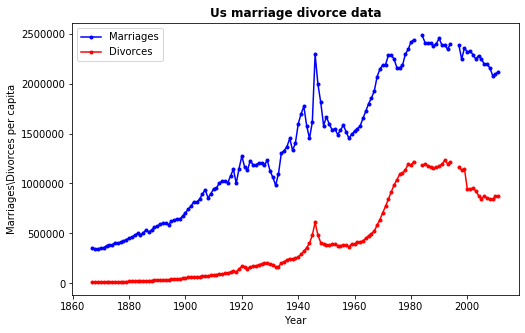

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
plt.figure(figsize=(8,5))
plt.title('Us marriage divorce data', fontdict={'fontweight':'bold', 'fontsize': 12})
plt.plot(us_marriage_divorce_data.Year, us_marriage_divorce_data.Marriages, 'b.-', label='Marriages')
plt.plot(us_marriage_divorce_data.Year, us_marriage_divorce_data.Divorces, 'r.-', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Marriages\Divorces per capita')
plt.legend()
plt.savefig('Us marriage divorce data.png', dpi=300)
plt.show()

# QUESTION 7
# Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!
# ANSWER 7 - 

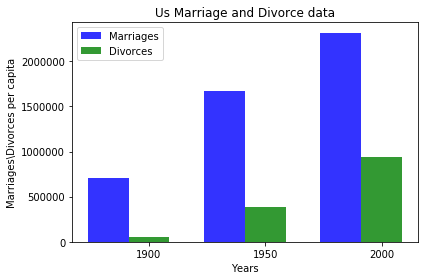

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = tuple(us_marriage_divorce_data['Year'].values.tolist())
marriages = tuple(us_marriage_divorce_data['Marriages'].values.tolist())
divorces= tuple(us_marriage_divorce_data['Divorces'].values.tolist())

# create plot
n_groups = 3

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, marriages, bar_width,
alpha=opacity,
color='b',
label='Marriages')

rects2 = plt.bar(index + bar_width, divorces, bar_width,
alpha=opacity,
color='g',
label='Divorces')

plt.xlabel('Years')
plt.ylabel('Marriages\Divorces per capita')
plt.title('Us Marriage and Divorce data')
plt.xticks(index + bar_width, (1900, 1950, 2000))
plt.legend()

plt.tight_layout()
plt.show()

# QUESTION 8
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!
# ANSWER 8 - 

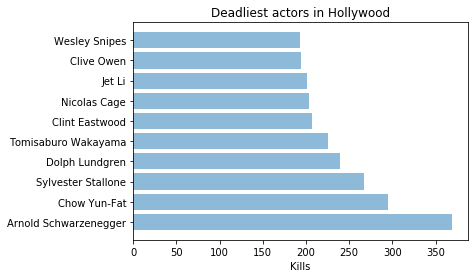

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
hollywood_actor_kills=hollywood_actor_kills.sort_values(by=['Count'],ascending=False)
actor_names = tuple(hollywood_actor_kills['Actor'].values.tolist())
kill_counts = hollywood_actor_kills['Count'].values.tolist()
hollywood_actor_kills
objects = actor_names
y_pos = np.arange(len(objects))
performance = kill_counts
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Kills')
plt.title('Deadliest actors in Hollywood')
plt.show()

# QUESTION 9
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.
# ANSWER 9 -

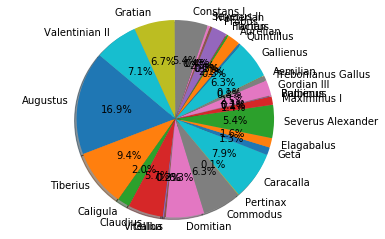

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

emperors_list = assassinated_emperors['Emperor'].values.tolist()
sizes_list = assassinated_emperors['Length_of_Reign'].values.tolist()
labels = emperors_list
sizes = sizes_list 
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# QUESTION 10
# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.
# ANSWER 10 - 

Text(0.5, 1, 'Relationship between the total revenue earned by arcades\nAnd the number of Computer Science PhDs awarded in the U.S.\n 2000 - 2009')

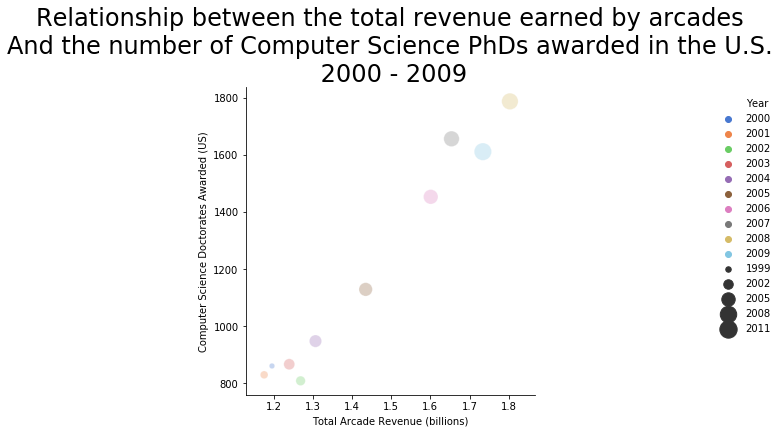

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


arc=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arc1= arc.loc[(arc['Year']>=2000)&(arc['Year']<=2009)]

ss= sns.relplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", size="Year",
            sizes=(30, 300), alpha=.3, palette="muted",
            height=5, data=arc)
plt.title("Relationship between the total revenue earned by arcades\nAnd the number of Computer Science PhDs awarded in the U.S.\n 2000 - 2009", fontsize=24)